In [2]:
import os
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt


In [6]:
def find_fwhm(smooth_signal, min_peak_prom = 0.25):
    smooth_peaks, _ = sig.find_peaks(smooth_signal, prominence=(np.max(smooth_signal)-np.min(smooth_signal))*min_peak_prom)
    proms, leftBases, rightBases = sig.peak_prominences(smooth_signal, smooth_peaks)
    widths, heights, leftIndex, rightIndex = sig.peak_widths(smooth_signal, smooth_peaks, rel_height=0.5)
    return(proms, leftBases, rightBases, widths, heights, leftIndex, rightIndex)

36.39992274321032


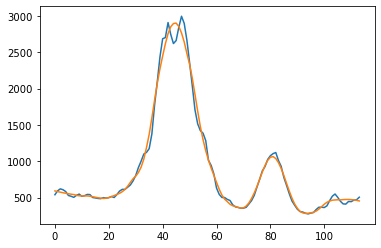

In [18]:
trace_path = '/Users/bementmbp/Desktop/double_peak.rtf'

minPeakProm = 0.25
trace = np.loadtxt(trace_path)
raw = trace[:,1]
smoothed = sig.savgol_filter(raw, window_length=15, polyorder=2)

proms, leftBases, rightBases, widths, heights, leftIndex, rightIndex = find_fwhm(smoothed)

'''
proms = 
leftBases = 
rightBases = 
widths = 
heights = 
leftIndex = 
rightIndex = 
'''

main_peak_index = np.argmax(widths)
width = widths[main_peak_index]
left_background = leftIndex[main_peak_index]
print(left_background)
right_background = rightIndex[main_peak_index]
peak_amplitude = proms[main_peak_index]

fig, ax = plt.subplots()

#ax.vlines(x = left_background, ymin = smoothed[left_background], ymax = smoothed[left_background] + peak_amplitude)  #leftBases[index], ymin=smoothed[leftBases[index]], ymax=smoothed[leftBases[index]] + proms[index])
#ax.hlines(heights[index], leftIndex[index], rightIndex[index])

ax.plot(raw)
ax.plot(smoothed)
plt.show()
